# Use case examples on synthetic dataset

In [1]:
from abcd_rf_fit import *
import numpy as np

## Transmission

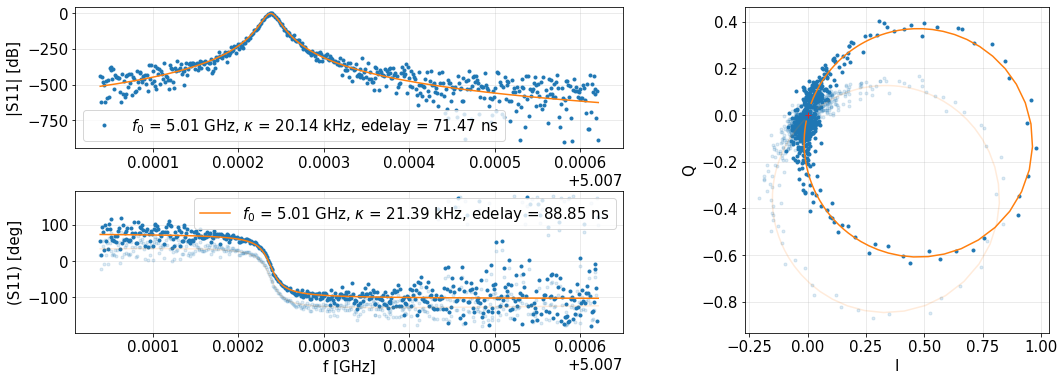

In [4]:
freq, signal, params = get_synthetic_signal('t')

fit_func, fit_params = fit_signal(freq, signal, 't')
fit = fit_func(freq, *fit_params.tolist())
plot(freq, signal, fit, params=params, fit_params=fit_params)

## Reflection

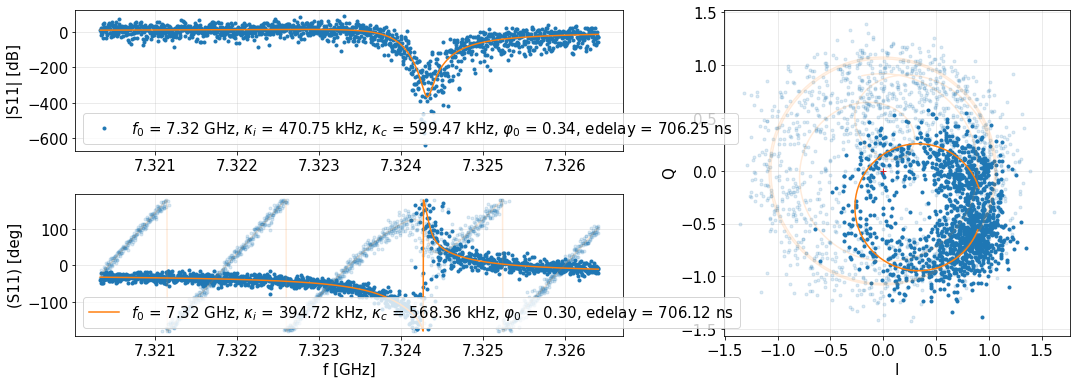

In [5]:
freq, signal, params = get_synthetic_signal('rm')

fit_func, fit_params = fit_signal(freq, signal, 'r', final_ls_opti=False)
fit = fit_func(freq, *fit_params.tolist())

plot(freq, signal, fit, params=params, fit_params=fit_params)


## Hanger

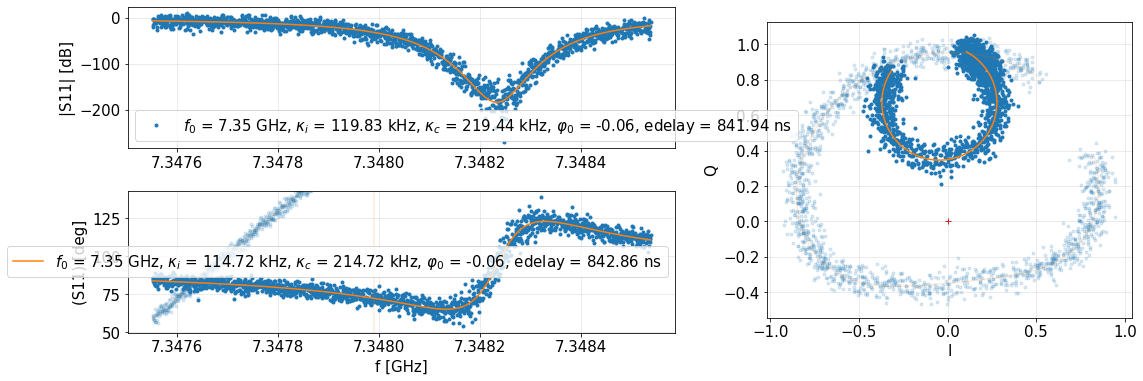

In [6]:
freq, signal, params = get_synthetic_signal('hm')

fit_func, fit_params = fit_signal(freq, signal, 'h')
fit = fit_func(freq, *fit_params.tolist())
plot(freq, signal, fit, params=params, fit_params=fit_params)

# Fit of pure signals

## Transmission

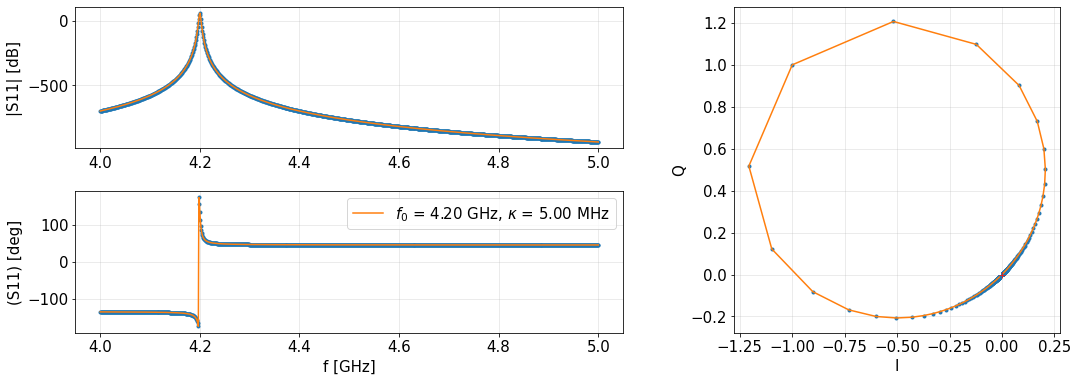

In [11]:
freq = np.linspace(4, 5, 1001)*1e9
res_func = get_fit_function('t', amplitude=True, edelay=False)

signal = res_func(freq, 4.2e9, 5e6, -1, 1)
fit_func, fit_params = fit_signal(freq, signal, 't', fit_edelay=False)
fit = fit_func(freq, *fit_params.tolist())
plot(freq, signal, fit, fit_params=fit_params)

## Reflection

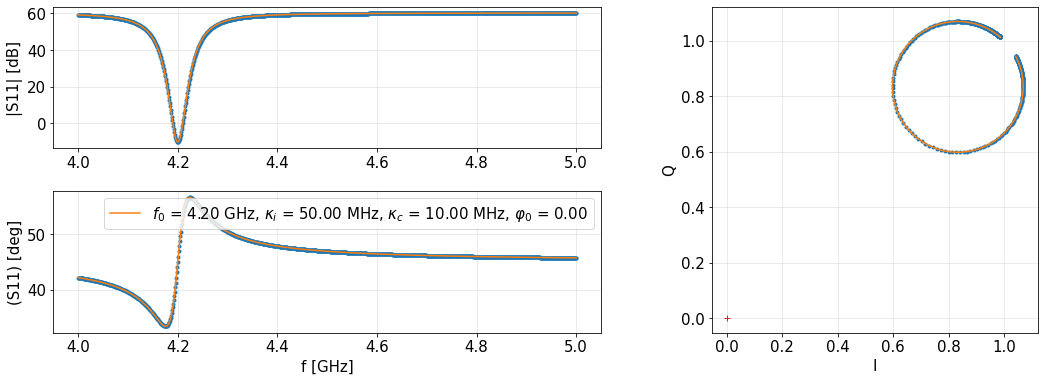

In [13]:
freq = np.linspace(4, 5, 1001)*1e9
res_func = get_fit_function('r', amplitude=True, edelay=False)

signal = res_func(freq, 4.2e9, 50e6, 10e6, 1, 1)
fit_func, fit_params = fit_signal(freq, signal, 'r', fit_edelay=False, final_ls_opti=False)
fit = fit_func(freq, *fit_params.tolist())
plot(freq, signal, fit, fit_params=fit_params)

## Hanger

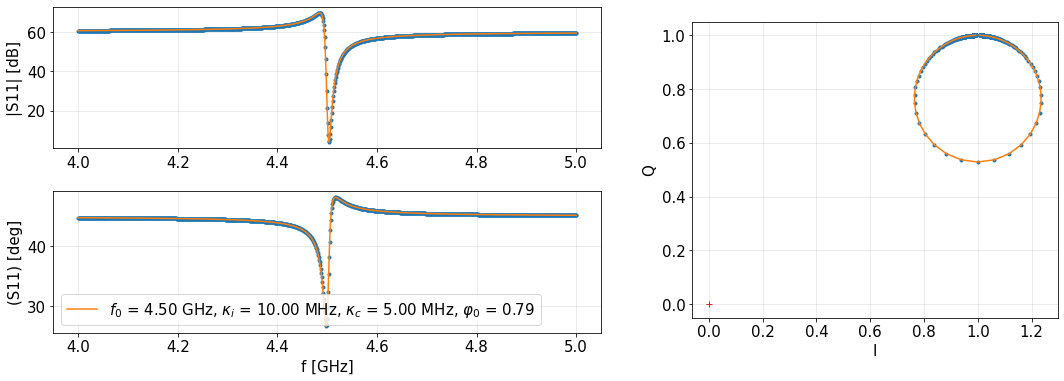

In [14]:
freq = np.linspace(4, 5, 1001)*1e9
res_func = get_fit_function('h', amplitude=True, edelay=False)

signal = res_func(freq, 4.5e9, 10e6, 5e6, np.pi/4, 1, 1)
fit_func, fit_params = fit_signal(freq, signal, 'h', fit_edelay=False)
fit = fit_func(freq, *fit_params.tolist())
plot(freq, signal, fit, fit_params=fit_params)

# How good is abcd_rf_fit on this data set ?

In [15]:
from tqdm import tqdm

n = 100

synthetic_params = np.zeros((n, 4))
estimated_params = np.zeros((n, 4))
estimated_params_rec = np.zeros((n, 4))

for i in tqdm(range(n)):

    freq, signal, params = get_synthetic_signal()
    synthetic_params[i] = params.tolist()
    
    fit, fit_params = fit_signal(freq, signal, 'r')
    estimated_params[i, :3] = fit_params.tolist()[:3]
    estimated_params[i, 3] = fit_params.tolist()[-1]

    fit, fit_params = fit_signal(freq, signal, 'r', rec_depth=2)
    estimated_params_rec[i, :3] = fit_params.tolist()[:3]
    estimated_params_rec[i, 3] = fit_params.tolist()[-1]

100%|██████████| 100/100 [02:55<00:00,  1.76s/it]


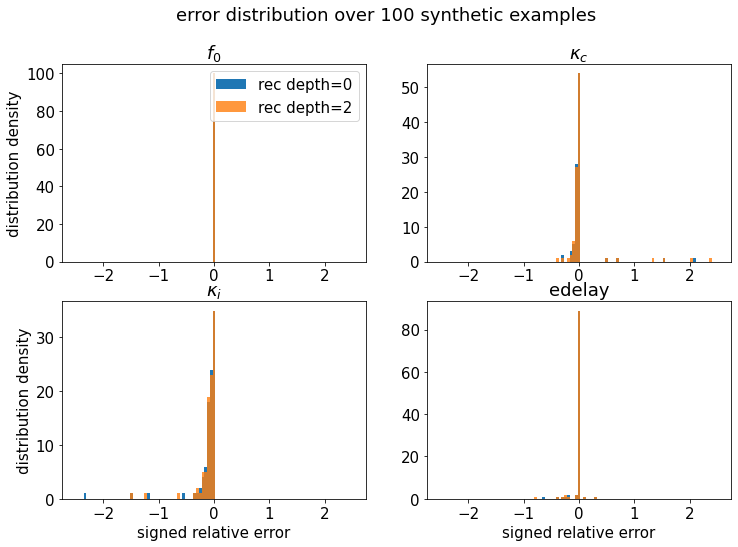

In [16]:
import matplotlib.pyplot as plt

singed_relative_error = (-1+estimated_params/synthetic_params)
singed_relative_error_rec = (-1+estimated_params_rec/synthetic_params)

fig, axes = plt.subplots(2, 2, figsize =(12, 8))

titles = [r'$f_0$', r'$\kappa_i$', r'$\kappa_c$', r'edelay']

fig.suptitle('error distribution over %i synthetic examples'%n)

for i in range(4):
    j, k = i%2, i//2
    ax = axes[j, k]
    ax.set_title(titles[i])
    ax.hist(singed_relative_error[:, i], bins=101, range=(-2.5, 2.5), label='rec depth=0')
    ax.hist(singed_relative_error_rec[:, i], bins=101, range=(-2.5, 2.5), alpha=0.8, label='rec depth=2')
    
    if i == 0:
        ax.legend()
    if k == 0:
        ax.set_ylabel(r'distribution density')
    if j == 1:
        ax.set_xlabel(r'signed relative error')


plt.show()

In [20]:
from tqdm import tqdm

n = 2000

synthetic_params = np.zeros((n, 4))
estimated_params = np.zeros((n, 4))
estimated_params_final = np.zeros((n, 4))

for i in tqdm(range(n)):

    freq, signal, params = get_synthetic_signal()
    synthetic_params[i] = params.tolist()
    
    fit, fit_params = fit_signal(freq, signal, 'r', rec_depth=0, final_ls_opti=False)
    estimated_params[i, :3] = fit_params.tolist()[:3]
    estimated_params[i, 3] = fit_params.tolist()[-1]

    fit, fit_params = fit_signal(freq, signal, 'r')
    estimated_params_final[i, :3] = fit_params.tolist()[:3]
    estimated_params_final[i, 3] = fit_params.tolist()[-1]

100%|██████████| 2000/2000 [1:15:16<00:00,  2.26s/it]   


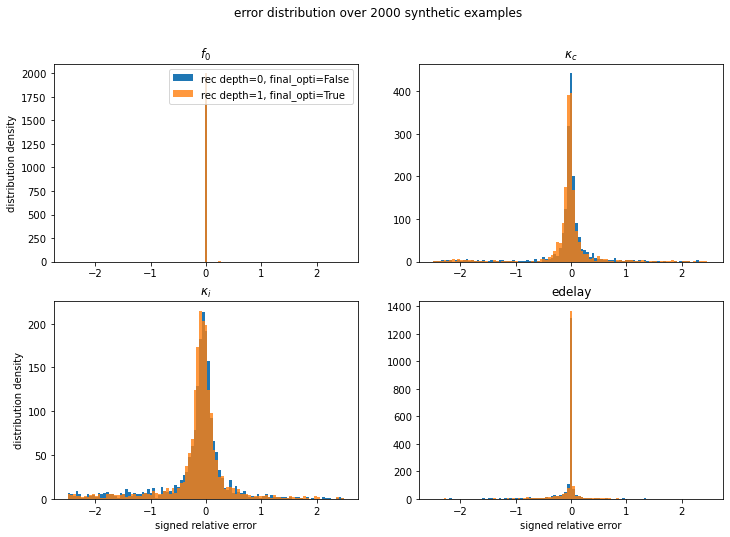

In [21]:
singed_relative_error = (-1+estimated_params/synthetic_params)
singed_relative_error_final = (-1+estimated_params_final/synthetic_params)

fig, axes = plt.subplots(2, 2, figsize =(12, 8))

titles = [r'$f_0$', r'$\kappa_i$', r'$\kappa_c$', r'edelay']

fig.suptitle('error distribution over %i synthetic examples'%n)

for i in range(4):
    j, k = i%2, i//2
    ax = axes[j, k]
    ax.set_title(titles[i])
    ax.hist(singed_relative_error[:, i], bins=101, range=(-2.5, 2.5), label='rec depth=0, final_opti=False')
    ax.hist(singed_relative_error_final[:, i], bins=101, range=(-2.5, 2.5), alpha=0.8, label='rec depth=1, final_opti=True')
    
    if i == 0:
        ax.legend()
    if k == 0:
        ax.set_ylabel(r'distribution density')
    if j == 1:
        ax.set_xlabel(r'signed relative error')


plt.show()